In [1]:
import pandas as pd

In [5]:
# Load the Excel file
excel_file = '../feature_ranking_plot/feature_ranking_consol.xlsx'
rankings_df = pd.read_excel(excel_file)

In [6]:
rankings_df

,CHI_2,Fisher Score,Gain Ratio,Information Gain,Gini Index,Mutual Information,Pearson Correlation,Symmetric Uncertainty,PassiLuukaEntropy,ReliefF
0,f20,f29,f5,f21,f5,f5,f29,f12,f32,f8
1,f21,f33,f3,f20,f5,f3,f33,f4,f34,f7
2,f9,f34,f6,f9,f5,f6,f34,f26,f33,f20
3,f7,f12,f4,f7,f5,f4,f12,f39,f3,f21
4,f11,f39,f29,f18,f5,f29,f39,f25,f36,f9
5,f18,f38,f30,f15,f5,f30,f38,f30,f12,f22
6,f14,f25,f33,f11,f5,f33,f25,f38,f38,f18
7,f15,f26,f34,f14,f5,f34,f26,f3,f25,f11
8,f17,f4,f12,f17,f5,f12,f4,f29,f26,f15
9,f22,f23,f38,f19,f5,f38,f23,f5,f40,f14


In [17]:
# Extract top features from each filter method
top_features_by_method = {}
for column in rankings_df.columns:
    method_name = column  # Assuming column names are the filter method names
    top_features_by_method[method_name] = set(rankings_df[column][:10])  # Assuming you want top 10 features

# Find the intersection of top features
ensemble_features = set.union(*top_features_by_method.values())

In [18]:
ensemble_features

{'f11',
 'f12',
 'f14',
 'f15',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f25',
 'f26',
 'f29',
 'f3',
 'f30',
 'f32',
 'f33',
 'f34',
 'f36',
 'f38',
 'f39',
 'f4',
 'f40',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9'}

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Load the Excel file
excel_file = '../feature_ranking_plot/feature_ranking_consol.xlsx'
rankings_df = pd.read_excel(excel_file)

In [43]:
# Load the dataset from CSV file
train_dataset_file = '../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv'
train_dataset = pd.read_csv(train_dataset_file)

In [44]:
# Load the test dataset from CSV file
test_dataset_file = '../../data/BinaryClassify/test_nsl_kdd_binary_encoded.csv'
test_dataset = pd.read_csv(test_dataset_file)

In [45]:
# Rename columns to f1, f2, ..., f42
train_dataset.columns = [f'f{i+1}' for i in range(len(train_dataset.columns))]
test_dataset.columns = [f'f{i+1}' for i in range(len(test_dataset.columns))]

In [46]:
# Extract top features from each filter method
top_features_by_method = {}
for column in rankings_df.columns:
    method_name = column
    top_features_by_method[method_name] = rankings_df[column][:10]  # Assuming you want top 10 features


In [47]:
top_features_by_method

{'CHI_2': 0    f20
 1    f21
 2     f9
 3     f7
 4    f11
 5    f18
 6    f14
 7    f15
 8    f17
 9    f22
 Name: CHI_2, dtype: object,
 'Fisher Score': 0    f29
 1    f33
 2    f34
 3    f12
 4    f39
 5    f38
 6    f25
 7    f26
 8     f4
 9    f23
 Name: Fisher Score, dtype: object,
 'Gain Ratio': 0     f5
 1     f3
 2     f6
 3     f4
 4    f29
 5    f30
 6    f33
 7    f34
 8    f12
 9    f38
 Name: Gain Ratio, dtype: object,
 'Information Gain': 0    f21
 1    f20
 2     f9
 3     f7
 4    f18
 5    f15
 6    f11
 7    f14
 8    f17
 9    f19
 Name: Information Gain, dtype: object,
 'Gini Index': 0    f5
 1    f5
 2    f5
 3    f5
 4    f5
 5    f5
 6    f5
 7    f5
 8    f5
 9    f5
 Name: Gini Index, dtype: object,
 'Mutual Information': 0     f5
 1     f3
 2     f6
 3     f4
 4    f29
 5    f30
 6    f33
 7    f34
 8    f12
 9    f38
 Name: Mutual Information, dtype: object,
 'Pearson Correlation': 0    f29
 1    f33
 2    f34
 3    f12
 4    f39
 5    f38
 6    f25
 7    f

In [48]:
# Create ensemble size vs accuracy plot
ensemble_sizes = range(1, 11)
accuracies = []

In [49]:
# Train Random Forest for each ensemble size
for ensemble_size in ensemble_sizes:
    selected_features = set()
    for method, top_features in top_features_by_method.items():
        selected_features.update(top_features[:ensemble_size])
    
    X_train = train_dataset[list(selected_features)]
    y_train = train_dataset['f43']  # Update 'target_column' with the actual column name of your target variable
    
    X_test = test_dataset[list(selected_features)]
    y_test = test_dataset['f43']  # Update 'target_column' with the actual column name of your target variable

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict and calculate accuracy on test data
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print training progress
    print(f"Ensemble Size: {ensemble_size}, Accuracy: {accuracy:.4f}")

Ensemble Size: 1, Accuracy: 0.7976
Ensemble Size: 2, Accuracy: 0.7943
Ensemble Size: 3, Accuracy: 0.7845
Ensemble Size: 4, Accuracy: 0.7858
Ensemble Size: 5, Accuracy: 0.7812
Ensemble Size: 6, Accuracy: 0.7769
Ensemble Size: 7, Accuracy: 0.7829
Ensemble Size: 8, Accuracy: 0.7829
Ensemble Size: 9, Accuracy: 0.7829
Ensemble Size: 10, Accuracy: 0.7831


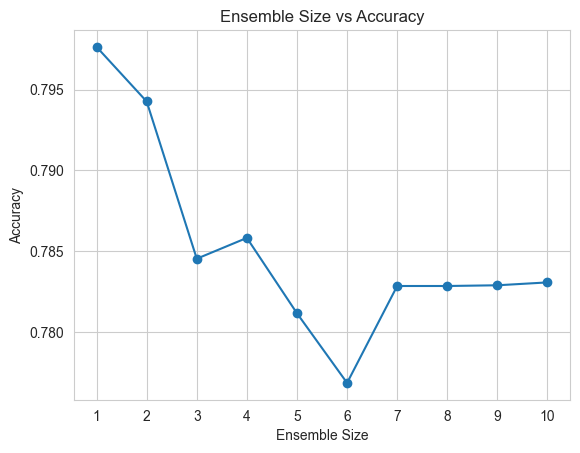

In [50]:
# Plot ensemble size vs accuracy
plt.plot(ensemble_sizes, accuracies, marker='o')
plt.title('Ensemble Size vs Accuracy')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.xticks(ensemble_sizes)
plt.grid(True)
plt.show()

In [36]:
ensemble_sizes

range(1, 11)

In [38]:
len(accuracies)

13

In [52]:
# Create ensemble size vs accuracy plot
ensemble_sizes = range(1, 11)
knn_accuracies = []
rf_accuracies = []
dt_accuracies = []

# Train and evaluate models for each ensemble size
for ensemble_size in ensemble_sizes:
    selected_features = set()
    for method, top_features in top_features_by_method.items():
        selected_features.update(top_features[:ensemble_size])
    
    X_train = train_dataset[list(selected_features)]
    y_train = train_dataset['f43']  # Update 'target_column' with the actual column name of your target variable
    
    X_test = test_dataset[list(selected_features)]
    y_test = test_dataset['f43']  # Update 'target_column' with the actual column name of your target variable

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(knn_accuracy)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_accuracies.append(rf_accuracy)

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_accuracies.append(dt_accuracy)

    # Print training progress
    print(f"Ensemble Size: {ensemble_size}, KNN Accuracy: {knn_accuracy:.4f}, RF Accuracy: {rf_accuracy:.4f}, DT Accuracy: {dt_accuracy:.4f}")


Ensemble Size: 1, KNN Accuracy: 0.8009, RF Accuracy: 0.7976, DT Accuracy: 0.8079
Ensemble Size: 2, KNN Accuracy: 0.8051, RF Accuracy: 0.7943, DT Accuracy: 0.7705
Ensemble Size: 3, KNN Accuracy: 0.7938, RF Accuracy: 0.7845, DT Accuracy: 0.8161
Ensemble Size: 4, KNN Accuracy: 0.7938, RF Accuracy: 0.7858, DT Accuracy: 0.8414
Ensemble Size: 5, KNN Accuracy: 0.7939, RF Accuracy: 0.7812, DT Accuracy: 0.8001
Ensemble Size: 6, KNN Accuracy: 0.7939, RF Accuracy: 0.7769, DT Accuracy: 0.8036
Ensemble Size: 7, KNN Accuracy: 0.7939, RF Accuracy: 0.7829, DT Accuracy: 0.8079
Ensemble Size: 8, KNN Accuracy: 0.7939, RF Accuracy: 0.7829, DT Accuracy: 0.8079
Ensemble Size: 9, KNN Accuracy: 0.7939, RF Accuracy: 0.7829, DT Accuracy: 0.8063
Ensemble Size: 10, KNN Accuracy: 0.7807, RF Accuracy: 0.7831, DT Accuracy: 0.8282


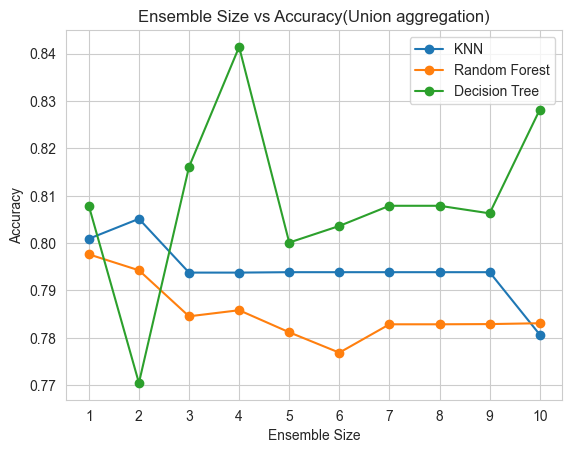

In [54]:
# Plot ensemble size vs accuracies for all three algorithms
plt.plot(ensemble_sizes, knn_accuracies, marker='o', label='KNN')
plt.plot(ensemble_sizes, rf_accuracies, marker='o', label='Random Forest')
plt.plot(ensemble_sizes, dt_accuracies, marker='o', label='Decision Tree')

plt.title('Ensemble Size vs Accuracy(Union aggregation)')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.xticks(ensemble_sizes)
plt.legend()
plt.grid(True)
plt.show()

Ensemble Size: 1, KNN Accuracy: 0.9803, RF Accuracy: 0.9839, DT Accuracy: 0.9835
Ensemble Size: 2, KNN Accuracy: 0.9942, RF Accuracy: 0.9979, DT Accuracy: 0.9979
Ensemble Size: 3, KNN Accuracy: 0.9956, RF Accuracy: 0.9987, DT Accuracy: 0.9977
Ensemble Size: 4, KNN Accuracy: 0.9956, RF Accuracy: 0.9985, DT Accuracy: 0.9979
Ensemble Size: 5, KNN Accuracy: 0.9957, RF Accuracy: 0.9986, DT Accuracy: 0.9985
Ensemble Size: 6, KNN Accuracy: 0.9957, RF Accuracy: 0.9987, DT Accuracy: 0.9983
Ensemble Size: 7, KNN Accuracy: 0.9957, RF Accuracy: 0.9987, DT Accuracy: 0.9986
Ensemble Size: 8, KNN Accuracy: 0.9957, RF Accuracy: 0.9987, DT Accuracy: 0.9986
Ensemble Size: 9, KNN Accuracy: 0.9957, RF Accuracy: 0.9988, DT Accuracy: 0.9986
Ensemble Size: 10, KNN Accuracy: 0.9962, RF Accuracy: 0.9986, DT Accuracy: 0.9984


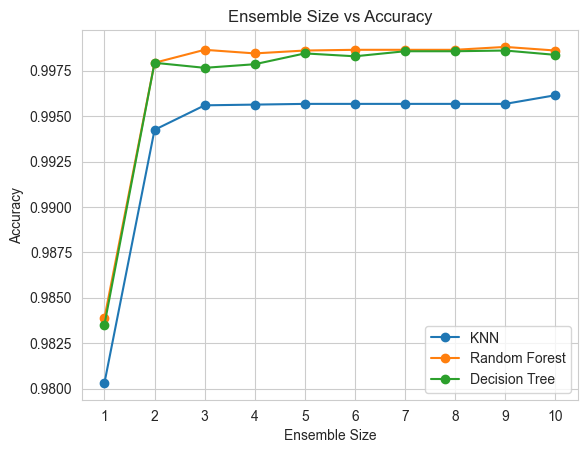

In [55]:
# Create ensemble size vs accuracy plot
ensemble_sizes = range(1, 11)
knn_accuracies = []
rf_accuracies = []
dt_accuracies = []

# Train and evaluate models for each ensemble size
for ensemble_size in ensemble_sizes:
    selected_features = set()
    for method, top_features in top_features_by_method.items():
        selected_features.update(top_features[:ensemble_size])
    
    X = dataset[list(selected_features)]
    y = dataset['f43']  # Update 'target_column' with the actual column name of your target variable

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(knn_accuracy)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_accuracies.append(rf_accuracy)

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_accuracies.append(dt_accuracy)

    # Print training progress
    print(f"Ensemble Size: {ensemble_size}, KNN Accuracy: {knn_accuracy:.4f}, RF Accuracy: {rf_accuracy:.4f}, DT Accuracy: {dt_accuracy:.4f}")

# Plot ensemble size vs accuracies for all three algorithms
plt.plot(ensemble_sizes, knn_accuracies, marker='o', label='KNN')
plt.plot(ensemble_sizes, rf_accuracies, marker='o', label='Random Forest')
plt.plot(ensemble_sizes, dt_accuracies, marker='o', label='Decision Tree')

plt.title('Ensemble Size vs Accuracy')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.xticks(ensemble_sizes)
plt.legend()
plt.grid(True)
plt.show()
